<a href="https://colab.research.google.com/github/Evan-Barry/GYP_GAN_Prototype/blob/main/Mountain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [3]:
# Imports

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

**Plotting Function**

In [10]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((3,3)), cmap='Greys_r')  
    return fig, axes

**Examples of Mounatains**

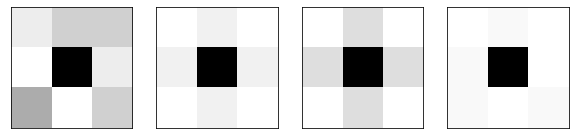

In [37]:
# Examples of mountains
faces = [np.array([0.2,0.3,0.3,0.1,0.8,0.2,0.4,0.1,0.3]),
         np.array([0,0.1,0,0.1,0.9,0.1,0,0.1,0]),
         np.array([0.1,0.3,0.1,0.3,1,0.3,0.1,0.3,0.1]),
         np.array([0.49,0.51,0.49,0.51,0.95,0.49,0.51,0.49,0.51])]
    
_ = view_samples(faces, 1, 4)

**Examples of Noise**

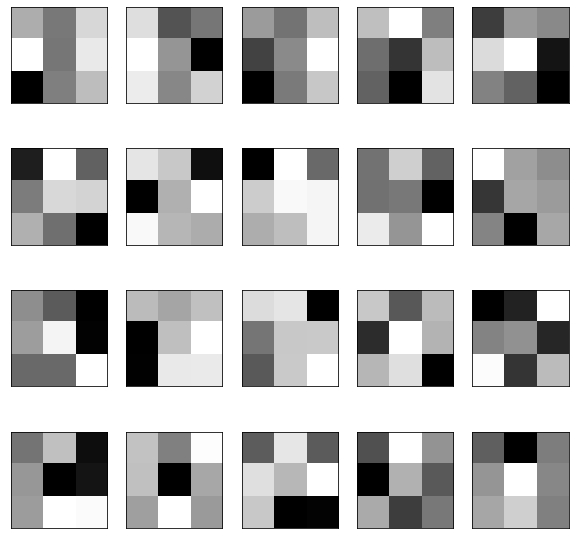

In [14]:
# Examples of noisy images
noise = [np.random.randn(3,3) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

**Building the Neural Networks

In [20]:
# The sigmoid activation function
def sigmoid(x):
  return np.exp(x)/(1.0+np.exp(x))

**The Discriminator**

In [24]:
class Discriminator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(9)])
    self.bias = np.random.normal()

  def forward(self, x):
    return sigmoid(np.dot(x, self.weights) + self.bias)

  def error_from_image(self, image):
    prediction = self.forward(image)
    return -np.log(prediction)

  def derivative_from_image(self, image):
    prediction = self.forward(image)
    derivatives_weights = -image * (1-prediction)
    derivatives_bias = -(1-prediction)
    return derivatives_weights, derivatives_bias

  def update_from_image(self, x):
    ders = self.derivative_from_image(x)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

  def error_from_noise(self, noise):
    prediction = self.forward(noise)
    return -np.log(1-prediction)

  def derivative_from_noise(self, noise):
    prediction = self.forward(noise)
    derivatives_weights = noise * prediction
    derivatives_bias = prediction
    return derivatives_weights, derivatives_bias

  def update_from_noise(self, noise):
    ders = self.derivative_from_noise(noise)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

**The Generator**

In [30]:
class Generator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(9)])
    self.biases = np.array([np.random.normal() for i in range(9)])

  def forward(self, z):
    return sigmoid(z * self.weights + self.biases)

  def error(self, z, discriminator):
    x = self.forward(z)
    y = discriminator.forward(x)
    return -np.log(y)

  def derivatives(self, z, discriminator):
    discriminator_weights = discriminator.weights
    discriminator_bias = discriminator.bias
    x = self.forward(z)
    y = discriminator.forward(x)
    factor = -(1-y) * discriminator_weights * x * (1-x)
    derivative_weights = factor * z
    derivative_bias = factor
    return derivative_weights, derivative_bias

  def update(self, z, discriminator):
    error_before = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights -= learning_rate * ders[0]
    self.biases -= learning_rate * ders[1]
    error_after = self.error(z, discriminator)

**Training**

In [38]:
# Set Random Seed
np.random.seed(42)

learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for face in faces:
    D.update_from_image(face)

    z = random.rand()

    errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))

    errors_generator.append(G.error(z, D))

    noise = G.forward(z)

    D.update_from_noise(noise)

    G.update(z,D)

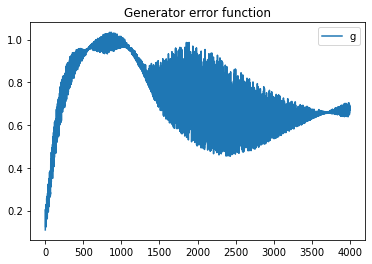

Text(0.5, 1.0, 'Discriminaotr error function')

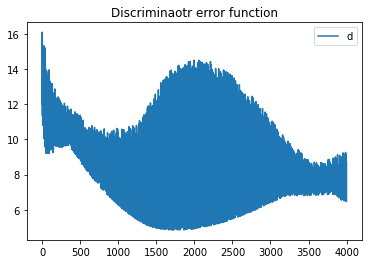

In [39]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminaotr error function")

**Generated Images**

[0.23231669 0.18266493 0.1740296  0.21107329 0.9646897  0.3968306
 0.17968482 0.15155164 0.21928642]
[0.18099558 0.04275334 0.12987624 0.03128049 0.97646028 0.29487956
 0.04847012 0.15797612 0.06179774]
[0.2277368  0.16371268 0.16999091 0.18355919 0.96584144 0.38794379
 0.16267221 0.15207194 0.19954586]
[0.18120842 0.04305522 0.1300542  0.03157435 0.97641642 0.29530987
 0.04877818 0.15794629 0.06218275]


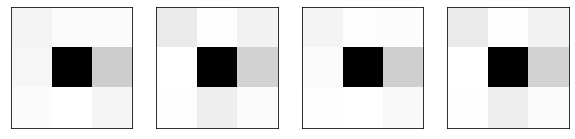

In [40]:
generated_images = []
for i in range(4):
  z = random.random()
  generated_image = G.forward(z)
  generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
  print(i)

**Studying the weights and biases of the Generator and Discriminator**

In [42]:
print("Generator Weights" , G.weights)
print("Generator Biases" , G.biases)

Generator Weights [-0.34491723 -1.76684504 -0.37825107 -2.32019264  0.45823477 -0.49718767
 -1.60052219  0.05389604 -1.59133776]
Generator Biases [-1.16725828 -1.35487546 -1.52660833 -1.12999962  3.27040946 -0.37830221
 -1.38847445 -1.72686072 -1.14056581]


In [44]:
print("Discriminator Weights" , D.weights)
print("Discriminator Biases" , D.bias)

Discriminator Weights [-0.60714091  1.21281787  0.23618481 -0.76811589  1.73019454  0.58714412
 -0.4438077  -0.24327453  0.96323398]
Discriminator Biases -1.8593055249540622
